# Graphlets: Application and Practice

This notebook demonstrates how to use graphlets to analyze the local structure around vertices in a network. We'll practice computing graphlet signatures and interpret what they tell us about vertex positions and roles.

Consider the broader context of this class, which includes a focus on helping you to learn how to do graph data science. An important set of tools for graph data science use data-driven models like neural networks and clustering algorithms. Data-driven models often require feature engineering, where a data engineer designs features that make it easier for the data-driven models to learn or be tuned. 

You can think of a graphlet signature for a vertex as a **vertex feature**. Specifically, a vertex's graphlet signature extracts feature information about local structural properties around the vertex.

## Setup

First, let's import the necessary libraries and utility functions.

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import Callable
from graphlet_utilities import (
    find_all_graphlets,
    find_subgraphs_containing_vertex,
    rooted_is_isomorphic,
    show_graphs_in_a_set,
    show_graph
)

# Section 1: Review Graphlets and Display All Possible Types

A **graphlet** is a small induced subgraph of size $k$ (typically 2-5 nodes) where we designate one node as the **root**. The root allows us to distinguish between different rooted isomorphism classes.

Graphlets are useful because they capture the **local structure** around a node—how that node is positioned relative to its neighbors. By counting the number of times a node appears as the root in each graphlet type, we can create a **graphlet signature vector** that characterizes the node's role in the network.

Let's examine all possible graphlets for different sizes:

### Two-Node Graphlets

With just two nodes, there is only **one possible graphlet**: an edge connecting the root node to another node.

Number of 2-node graphlets: 1


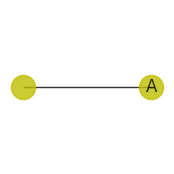

In [26]:
two_node_graphlets = find_all_graphlets(['A', 'B'], 'A')
print(f"Number of 2-node graphlets: {len(two_node_graphlets)}")
labels = {'A': 'A'}
show_graphs_in_a_set(two_node_graphlets, labels)

### Three-Node Graphlets

With three nodes, we can have different configurations depending on how many edges exist. The root node can be:
- Connected to both other nodes (with or without an edge between them)
- Connected to only one other node
- Isolated

This gives us **4 distinct three-node graphlets**.

Number of 3-node graphlets: 3


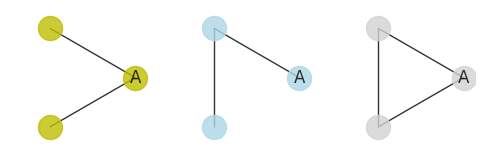

In [27]:
three_node_graphlets = find_all_graphlets(['A', 'B', 'C'], 'A')
print(f"Number of 3-node graphlets: {len(three_node_graphlets)}")
labels = {'A': 'A'}
show_graphs_in_a_set(three_node_graphlets, labels)

### Four-Node Graphlets

Four-node graphlets are where the real diversity emerges. The number of possible configurations grows significantly as we vary:
- How many neighbors the root is connected to
- How those neighbors are connected to each other

This results in **15 distinct four-node graphlets**.

Number of 4-node graphlets: 11


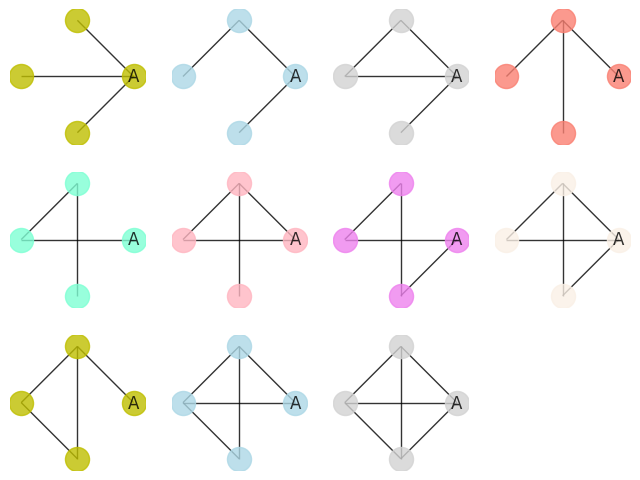

In [28]:
four_node_graphlets = find_all_graphlets(['A', 'B', 'C', 'D'], 'A')
print(f"Number of 4-node graphlets: {len(four_node_graphlets)}")
labels = {'A': 'A'}
show_graphs_in_a_set(four_node_graphlets, labels)

---

# Section 2: Counting Graphlet Occurrences in an Example Graph

Now we'll demonstrate how to count the occurrences of each graphlet type around a specific node in a real network.

First, let's create our example graph:

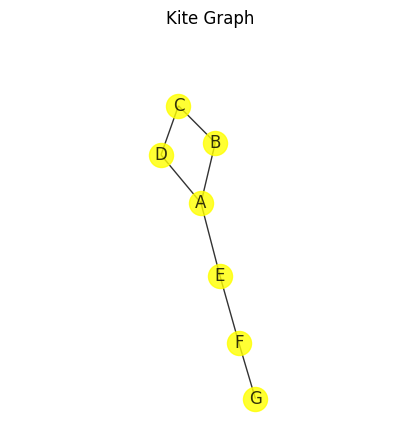

In [29]:
# Create the kite graph
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('E', 'F'), ('F', 'G'), ('A', 'E')])

labels = {vertex: vertex for vertex in G.nodes()}
show_graph(G,
           title='Kite Graph',
           labels=labels,
           layout=nx.spring_layout,
           size=4,
           node_color='yellow')

## Subsection 2.1: Two-Node Graphlets Involving Vertex A

We'll count all two-node subgraphs that contain vertex `A`. Since there's only one type of two-node graphlet, we just need to count how many neighbors `A` has.

Number of 2-node subgraphs containing vertex A: 3

These are:


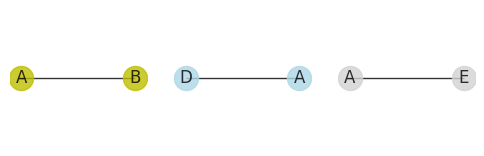

In [30]:
two_node_subgraphs = find_subgraphs_containing_vertex(G, 2, 'A')
print(f"Number of 2-node subgraphs containing vertex A: {len(two_node_subgraphs)}")
print(f"\nThese are:")

labels = {node: node for node in G.nodes()}
show_graphs_in_a_set(two_node_subgraphs, labels)

## Subsection 2.2: Three-Node Graphlets of Each Type for Vertex A

Now we'll count how many three-node subgraphs containing `A` match each of the four possible three-node graphlet types.

Total number of 3-node subgraphs containing vertex A: 6

Graphlet type 0: 3 occurrences
Matching subgraphs:
Graphlet type 1: 3 occurrences
Matching subgraphs:
Graphlet type 2: 0 occurrences

3-node graphlet counts for vertex A: [3, 3, 0]


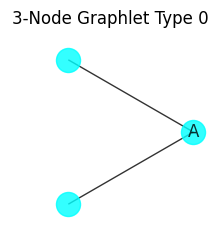

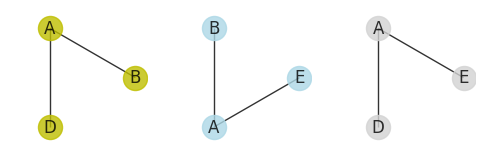

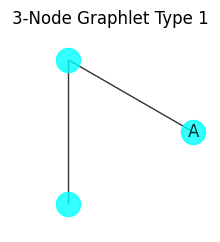

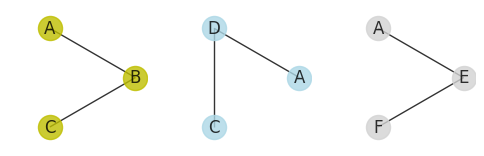

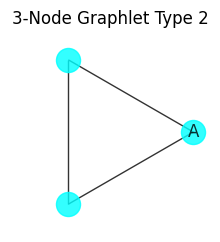

In [31]:
three_node_subgraphs = find_subgraphs_containing_vertex(G, 3, 'A')
print(f"Total number of 3-node subgraphs containing vertex A: {len(three_node_subgraphs)}\n")

three_node_counts = {}
graphlet_index = 0

root = 'A'
for graphlet in three_node_graphlets:
    # Find all subgraphs that match this graphlet type
    matching_subgraphs = []
    for H in three_node_subgraphs:
        if rooted_is_isomorphic(H, graphlet, root):
            matching_subgraphs.append(H)
    
    three_node_counts[graphlet_index] = len(matching_subgraphs)
    print(f"Graphlet type {graphlet_index}: {len(matching_subgraphs)} occurrences")
    
    # Display the graphlet type
    show_graph(graphlet,
               title=f'3-Node Graphlet Type {graphlet_index}',
               labels={root: root})
    
    # Display matching subgraphs if any
    if len(matching_subgraphs) > 0:
        print(f'Matching subgraphs:')
        show_graphs_in_a_set(matching_subgraphs, labels)
    
    graphlet_index += 1

print(f"\n3-node graphlet counts for vertex A: {list(three_node_counts.values())}")

## Subsection 2.3: Four-Node Graphlets of Each Type for Vertex A

Finally, we'll count four-node graphlet occurrences. This is where we see significant variation in how `A` is embedded in the network.

Total number of 4-node subgraphs containing vertex A: 7

Graphlet type 0: 1 occurrences
Matching subgraphs:
Graphlet type 1: 4 occurrences
Matching subgraphs:
Graphlet type 4: 1 occurrences
Matching subgraphs:
Graphlet type 6: 1 occurrences
Matching subgraphs:

4-node graphlet counts for vertex A: [1, 4, 0, 0, 1, 0, 1, 0, 0, 0, 0]


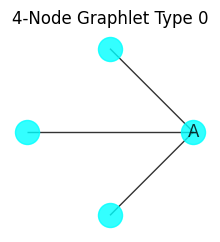

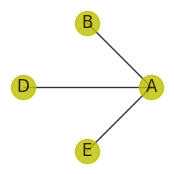

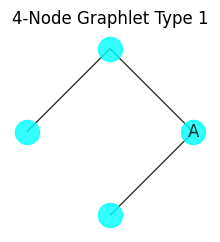

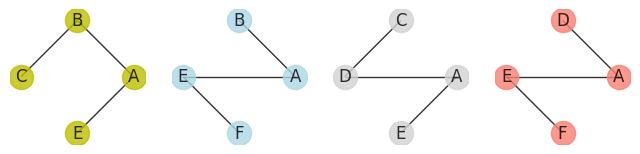

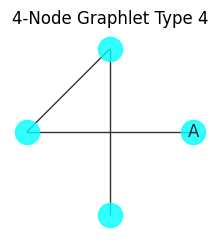

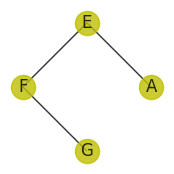

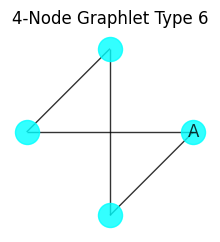

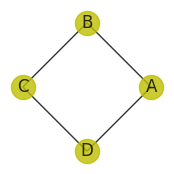

In [32]:
four_node_subgraphs = find_subgraphs_containing_vertex(G, 4, 'A')
print(f"Total number of 4-node subgraphs containing vertex A: {len(four_node_subgraphs)}\n")

four_node_counts = {}
graphlet_index = 0

root = 'A'
for graphlet in four_node_graphlets:
    # Find all subgraphs that match this graphlet type
    matching_subgraphs = []
    for H in four_node_subgraphs:
        if rooted_is_isomorphic(H, graphlet, root):
            matching_subgraphs.append(H)
    
    four_node_counts[graphlet_index] = len(matching_subgraphs)
    
    if len(matching_subgraphs) > 0:
        print(f"Graphlet type {graphlet_index}: {len(matching_subgraphs)} occurrences")
        
        # Display the graphlet type
        show_graph(graphlet,
                   title=f'4-Node Graphlet Type {graphlet_index}',
                   labels={root: root})
        
        # Display matching subgraphs
        print(f'Matching subgraphs:')
        show_graphs_in_a_set(matching_subgraphs, labels)
    
    graphlet_index += 1

print(f"\n4-node graphlet counts for vertex A: {list(four_node_counts.values())}")

## Graphlet Signature Vector for Vertex A

Combining all the counts, we create the **graphlet signature vector** for vertex `A`:

In [33]:
# Combine all counts: 1 two-node type + 4 three-node types + 15 four-node types
signature_vector = (
    [len(two_node_subgraphs)] +  # 1 type of 2-node graphlet
    list(three_node_counts.values()) +  # 4 types of 3-node graphlets
    list(four_node_counts.values())  # 15 types of 4-node graphlets
)

print("Graphlet Signature Vector for Vertex A:")
print(signature_vector)
print(f"\nTotal graphlet occurrences: {sum(signature_vector)}")

Graphlet Signature Vector for Vertex A:
[3, 3, 3, 0, 1, 4, 0, 0, 1, 0, 1, 0, 0, 0, 0]

Total graphlet occurrences: 16


---

# Section 3: Student Practice Problem - Butterfly Graph

Now it's your turn! Below is the **butterfly graph**—a graph consisting of two triangles sharing a single vertex (the center vertex M).

Your task: Compute the graphlet signature vector for three nodes in this graph.

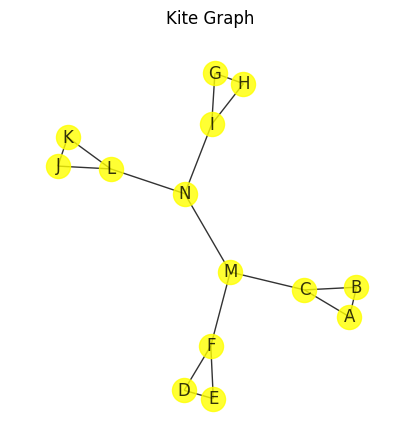

In [34]:
G = nx.Graph()
G.add_edges_from([('A','B'),('B','C'),('C','A'),
                  ('D','E'),('E','F'),('F','D'),
                  ('G','H'),('H','I'),('I','G'),
                  ('J','K'),('K','L'),('L','J'),
                  ('C','M'),('F','M'),('N','L'),('N','I'),
                  ('M','N')])

labels = {vertex: vertex for vertex in G.nodes()}
show_graph(G,
           title='Kite Graph',
           labels=labels,
           layout=nx.spring_layout,
           size=4,
           node_color='yellow')

## Your Tasks:

**Task 1**: Compute the graphlet signature vector for vertex `C` (a triangle vertex connected to the center).

**Task 2**: Compute the graphlet signature vector for vertex `M` (the center vertex connecting the two triangles).

**Task 3**: Compute the graphlet signature vector for vertex `A` (a triangle vertex not connected to the center).

### Questions to Consider:

1. How do the signature vectors differ between these three vertices?
2. Which vertex has the most diverse local structure (most variation in graphlet types)?
3. How does the connectivity of each vertex relate to its signature vector?
4. Can you identify what role each vertex plays in the network based on its graphlet signature?

---

## Solution Code Framework

Below is a framework to help you get started. Fill in the missing parts:

In [35]:
def compute_graphlet_signature(G: nx.Graph, vertex: str, max_size: int = 4) -> list:
    """
    Compute the graphlet signature vector for a given vertex.
    
    Parameters:
    -----------
    G : nx.Graph
        The graph to analyze
    vertex : str
        The vertex for which to compute the signature
    max_size : int
        Maximum graphlet size (2, 3, or 4)
    
    Returns:
    --------
    list
        The graphlet signature vector as a list of counts
    """
    signature = []
    root = vertex
    
    # TODO: Implement the function by:
    # 1. For each graphlet size (2 through max_size)
    # 2. Find all graphlets of that size
    # 3. Find all subgraphs of that size containing the vertex
    # 4. Count matches for each graphlet type
    # 5. Append counts to signature list
    
    return signature

In [36]:
# Task 1: Compute signature for vertex C
print("=" * 60)
print("TASK 1: Graphlet Signature for Vertex C")
print("=" * 60)

# TODO: Implement the analysis for vertex C
# Follow the pattern shown in Section 2 for the example graph

TASK 1: Graphlet Signature for Vertex C


In [37]:
# Task 2: Compute signature for vertex M
print("=" * 60)
print("TASK 2: Graphlet Signature for Vertex M")
print("=" * 60)

# TODO: Implement the analysis for vertex M

TASK 2: Graphlet Signature for Vertex M


In [38]:
# Task 3: Compute signature for vertex A
print("=" * 60)
print("TASK 3: Graphlet Signature for Vertex A")
print("=" * 60)

# TODO: Implement the analysis for vertex A

TASK 3: Graphlet Signature for Vertex A


## Reflection

After completing the analysis:

- **Write your answers** to the questions above in a text cell
- **Explain the significance** of the graphlet signatures you computed
- **Discuss** how graphlets could be used to identify important nodes or roles in a real network